In [25]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import sklearn
import statsmodels.api as sm
from scipy.stats import uniform, expon, norm, probplot, percentileofscore
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [2]:
# importar dataframe

df = pd.read_csv('BlackFriday.csv')
df.dropna(inplace=True)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
13,1000005,P00145042,M,26-35,20,A,1,1,1,2.0,5.0,15665
14,1000006,P00231342,F,51-55,9,A,1,0,5,8.0,14.0,5378
16,1000006,P0096642,F,51-55,9,A,1,0,2,3.0,4.0,13055


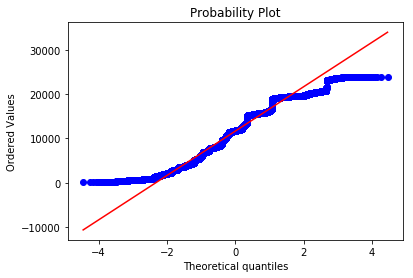

In [3]:
# o valor gasto parece não parece se ordenar de acordo com uma normal

probplot(df.Purchase, dist="norm", plot=plt);

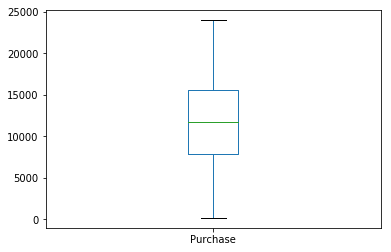

In [4]:
# Boxplor dos gastos dos clientes
# podemos ver que não há outliers de gasto em nossa tabela de gastos 

df.Purchase.plot.box();

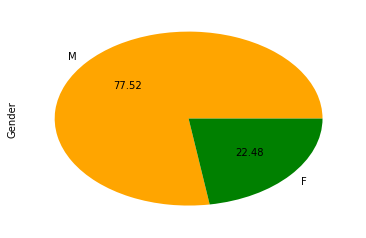

In [5]:
# gráfico de pizza com o genero dos consumidores (homem ou mulher)
# a grande maioria dos consumidores são homens

sexo = df['Gender'].value_counts()
sexo.plot(kind='pie', colors=('orange', 'green'), autopct="%0.2f",legend=False);

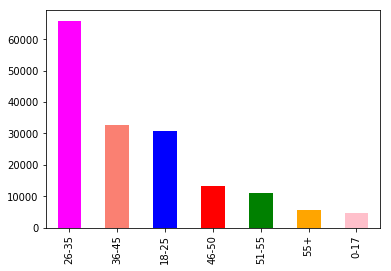

In [6]:
# gráfico de barras com as idades
# pode-se concluir que a maioria dos consumidores estao entre 18 e 45 anos

idades = df['Age'].value_counts()
idades.plot(kind='bar', color=('magenta', 'salmon', 'blue', 'red', 'green', 'orange', 'pink'), legend=False);

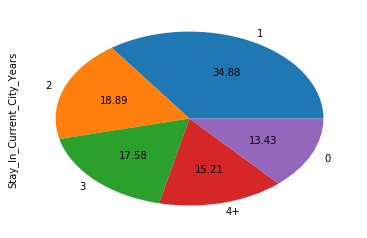

In [7]:
# gráfico de pizza com tempo do consumidor na cidade
# pode-se observar que quaase metade dos consumidores são novos na cidade 

tempo_cidade = df['Stay_In_Current_City_Years'].value_counts()
tempo_cidade.plot(kind='pie', autopct="%0.2f", legend=False);

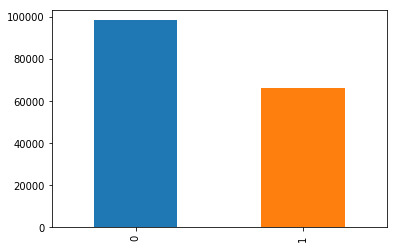

In [8]:
# gráfico de barras do estatus matrimonial
# observa-se que a maioria dos consumidores são solteiros

casados = df['Marital_Status'].value_counts()
casados.plot(kind='bar', legend=False);

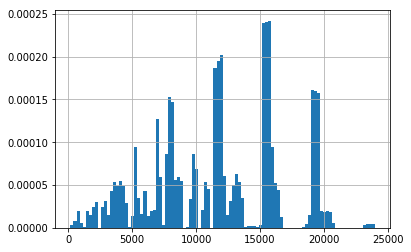

In [9]:
# histograma do valor gasto por pessoa
# parece apresentar várias tendencias em um gráfico só

df.Purchase.hist(density=True, bins=100);

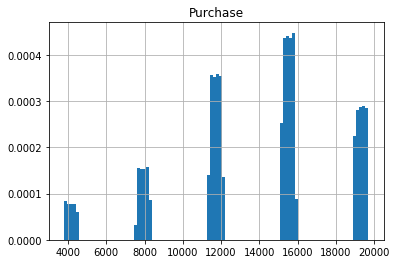

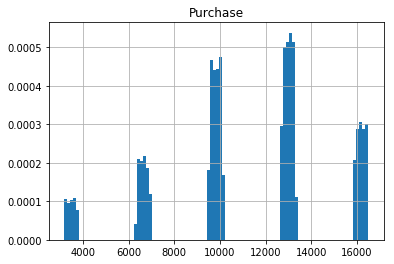

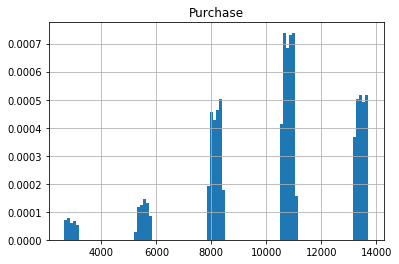

In [10]:
# todas as categorias apresentam tendencias semelhantes

df[df['Product_Category_1']==1].loc[:,['Purchase']].hist(density=True, bins=100);
df[df['Product_Category_1']==2].loc[:,['Purchase']].hist(density=True, bins=100);
df[df['Product_Category_1']==3].loc[:,['Purchase']].hist(density=True, bins=100);

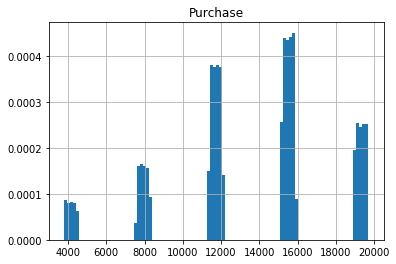

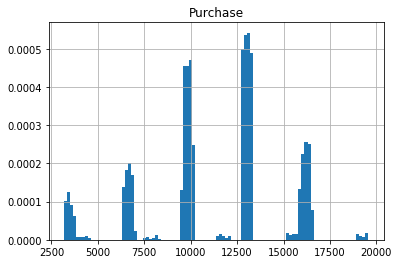

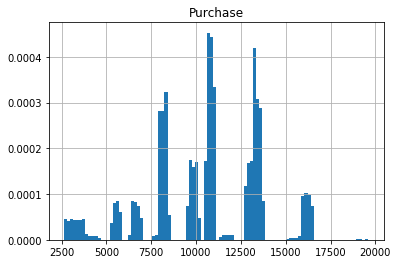

In [11]:
df[df['Product_Category_2']==2].loc[:,['Purchase']].hist(density=True, bins=100);
df[df['Product_Category_2']==3].loc[:,['Purchase']].hist(density=True, bins=100);
df[df['Product_Category_2']==4].loc[:,['Purchase']].hist(density=True, bins=100);

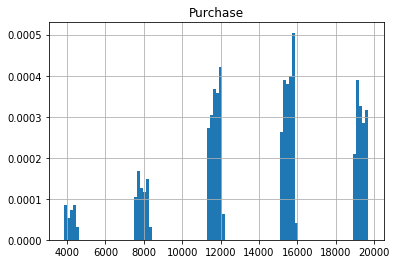

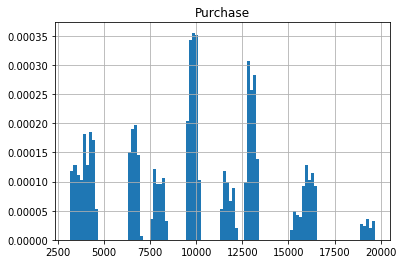

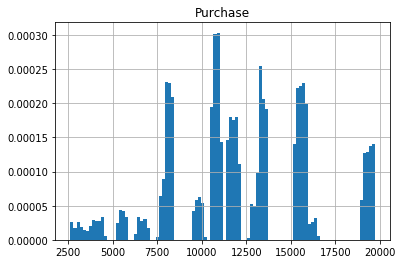

In [12]:
df[df['Product_Category_3']==3].loc[:,['Purchase']].hist(density=True, bins=100);
df[df['Product_Category_3']==4].loc[:,['Purchase']].hist(density=True, bins=100);
df[df['Product_Category_3']==5].loc[:,['Purchase']].hist(density=True, bins=100);

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

**Transformar variáveis qualitativas em binarias** 

In [14]:
s_idadesBinaria = pd.get_dummies(df, columns=['Age']).loc[:,['Age_0-17', 'Age_18-25', 'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55', 'Age_55+']]
s_idadesBinaria.head()

,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+
1,1,0,0,0,0,0,0
6,0,0,0,0,1,0,0
13,0,0,1,0,0,0,0
14,0,0,0,0,0,1,0
16,0,0,0,0,0,1,0


In [15]:
s_SexoBinario = pd.get_dummies(df, columns=['Gender']).loc[:,['Gender_F', 'Gender_M']]
s_SexoBinario.head()

,Gender_F,Gender_M
1,1,0
6,0,1
13,0,1
14,1,0
16,1,0


In [16]:
s_regiao = pd.get_dummies(df, columns=['City_Category']).loc[:,['City_Category_A', 'City_Category_B', 'City_Category_C']]
s_regiao.head()

,City_Category_A,City_Category_B,City_Category_C
1,1,0,0
6,0,1,0
13,1,0,0
14,1,0,0
16,1,0,0


In [17]:
s_tempo_cidadeBinario = pd.get_dummies(df, columns=['Stay_In_Current_City_Years']).loc[:,['Stay_In_Current_City_Years_0', 'Stay_In_Current_City_Years_1', 'Stay_In_Current_City_Years_2', 'Stay_In_Current_City_Years_3', 'Stay_In_Current_City_Years_4+']]
s_tempo_cidadeBinario.head()

,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
1,0,0,1,0,0
6,0,0,1,0,0
13,0,1,0,0,0
14,0,1,0,0,0
16,0,1,0,0,0


In [42]:
data0 = df.join(s_idadesBinaria, how='right', rsuffix=' ')
data1 = data0.join(s_SexoBinario, how='right', rsuffix=' ')
data2 = data1.join(s_regiao, how='right', rsuffix=' ')
data3 = data2.join(s_tempo_cidadeBinario, how='right', rsuffix=' ')

data3.dropna(inplace=True)
data = data3.drop(axis=1, columns=['Age','User_ID','Product_ID', 'Stay_In_Current_City_Years', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Occupation', 'Gender', 'City_Category'])
data.head()

,Marital_Status,Purchase,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
1,0,15200,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
6,1,19215,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0
13,1,15665,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0
14,0,5378,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0
16,0,13055,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0


In [55]:
data["MaisQue"] = False

In [56]:
data["MaisQue"] = data.Purchase > 10000

In [57]:
data.MaisQue.value_counts()

True     100983
False     63295
Name: MaisQue, dtype: int64

# Regressao Logistica

In [64]:
dataframe = data
dataframe = dataframe.drop(axis=1, columns=['Purchase','MaisQue'])
dataframe.head()

,Marital_Status,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
6,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0
13,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0
14,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0
16,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0


In [65]:
X_train, X_test, y_train, y_test = train_test_split(dataframe, data.MaisQue, test_size=0.33)

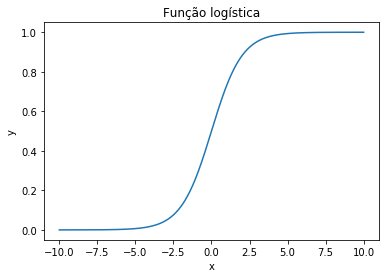

In [66]:
x_logistica = np.linspace(-10, 10, 500)
y_logistica = 1/(1 + np.exp(-x_logistica))

plt.plot(x_logistica, y_logistica)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Função logística');

In [67]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Acurácia: {}'.format(accuracy_score(y_test, y_pred)))

Acurácia: 0.6152696819892275


PLOTAR P-VALUES

In [63]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((110066, 19), (110066,), (54212, 19), (54212,))

## **regressão linear**

In [19]:
x = np.array(data['Purchase'])
x_ = np.mean(x)

In [20]:
Sxx = np.sum((x - x_)**2)
Sxx

4241991329132.533

In [21]:
y = np.array(data['Gender_M'])
y_ = np.mean(y)

In [22]:
Sxy = sum((x - x_)*(y - y_))
Sxy

21094339.273487665

In [23]:
beta1 = Sxy / Sxx
beta0 = y_ - beta1 * x_

In [24]:
print("beta0: {0}".format(beta0))
print("beta1: {0}".format(beta1))

beta0: 0.7171987826430175
beta1: 4.972744552450878e-06
